In [ ]:
import pandas as pd
data=pd.read_csv(r"C:\Users\YOGENDRA JANGID\OneDrive\Desktop\senti\amazon_reviews_all.csv")

In [ ]:
data

,Reviewer Name,Stars,Review Title,Review,Review Date,Verified Purchase,Helpful Votes
0,Unknown,Unknown,Unknown,Unknown,Unknown,No,0
1,Unknown,Unknown,Unknown,Unknown,Unknown,No,0
2,Unknown,4.5 out of 5 stars,Unknown,Unknown,Unknown,No,0
3,Unknown,4.5 out of 5 stars,Unknown,Unknown,Unknown,No,0
4,Unknown,Unknown,Unknown,Unknown,Unknown,No,0
...,...,...,...,...,...,...,...
126,Unknown,Unknown,Unknown,Unknown,Unknown,No,0
127,Unknown,Unknown,Unknown,Unknown,Unknown,No,0
128,SUDHAKAR,5.0 out of 5 stars,5.0 out of 5 stars\nExcellent Packing,The Seller and Amazon fulfilled their promise ...,Reviewed in India on 17 December 2024,Verified Purchase,8 people found this helpful
129,Unknown,Unknown,Unknown,Unknown,Unknown,No,0


In [ ]:
# now by looking at the data what i can say :
# we need only stars and revive column other all columns are not important:
# droping those columns:
data.drop(["Stars","Reviewer Name","Review Title","Review Date","Verified Purchase","Helpful Votes"],axis=1,inplace=True)

In [ ]:
data.describe()

,Review
count,130
unique,19
top,Unknown
freq,111


In [ ]:
# let drop the records having unknown revievs....(becuase we dont need those recods)
data=data[data["Review"]!="Unknown"]

In [ ]:
data

,Review
9,Its getting heat and camera clarity is not goo...
10,Its getting heat and camera clarity is not goo...
11,This is worst buy person who send this not let...
12,"Dual e sim is a good option. However, inspite ..."
13,bad
14,Nice phone
15,Quality not at all good
16,"Camera is good, charging is superfast, perfoma..."
17,Good phoneBut camera is not good.
18,iPhone 15 worst display.. it’s js 3 days but I...


In [ ]:
# now checking for "unknown" in whole dataframe:
data[(data == "Unknown").any(axis=1)]
# there is no "unknown"

,Review


In [ ]:
data.describe()

,Review
count,19
unique,18
top,Its getting heat and camera clarity is not goo...
freq,2


In [ ]:
data.isna().sum()

Review    1
dtype: int64

In [ ]:
data[data.isna().any(axis=1)]


,Review
56,NaN


In [ ]:
data.dropna(inplace=True)

C:\Users\YOGENDRA JANGID\AppData\Local\Temp\ipykernel_11448\1368182302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [ ]:
data.isna().sum()

Review    0
dtype: int64

In [ ]:
data.reset_index(drop=True,inplace=True)

In [ ]:
data.describe()

,Review
count,19
unique,18
top,Its getting heat and camera clarity is not goo...
freq,2


In [ ]:
data

,Review
0,Its getting heat and camera clarity is not goo...
1,Its getting heat and camera clarity is not goo...
2,This is worst buy person who send this not let...
3,"Dual e sim is a good option. However, inspite ..."
4,bad
5,Nice phone
6,Quality not at all good
7,"Camera is good, charging is superfast, perfoma..."
8,Good phoneBut camera is not good.
9,iPhone 15 worst display.. it’s js 3 days but I...


In [ ]:
data

,Review
0,Its getting heat and camera clarity is not goo...
1,Its getting heat and camera clarity is not goo...
2,This is worst buy person who send this not let...
3,"Dual e sim is a good option. However, inspite ..."
4,bad
5,Nice phone
6,Quality not at all good
7,"Camera is good, charging is superfast, perfoma..."
8,Good phoneBut camera is not good.
9,iPhone 15 worst display.. it’s js 3 days but I...


In [ ]:
data.dtypes

Review    object
dtype: object

In [ ]:
# Converting  Stars into sentiment labels:
# Positive (3): 4 and 5 stars
# Neutral (2): 3 stars
# Negative (1): 1 and 2 stars
# Mapping stars to sentiment labels defining function:
def star_sentiment(star):
    if star >= 4:
        return 2  # Positive
    elif star == 3:
        return 1  # Neutral
    else:
        return 0  # Negative

In [ ]:
data

,Review
0,Its getting heat and camera clarity is not goo...
1,Its getting heat and camera clarity is not goo...
2,This is worst buy person who send this not let...
3,"Dual e sim is a good option. However, inspite ..."
4,bad
5,Nice phone
6,Quality not at all good
7,"Camera is good, charging is superfast, perfoma..."
8,Good phoneBut camera is not good.
9,iPhone 15 worst display.. it’s js 3 days but I...


In [ ]:

# Text Cleaning Function
import string
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

In [ ]:
# Apply text cleaning
import re
data["Cleaned_Review"] = data["Review"].astype(str).apply(clean_text)

C:\Users\YOGENDRA JANGID\AppData\Local\Temp\ipykernel_11448\3122680478.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Cleaned_Review"] = data["Review"].astype(str).apply(clean_text)


In [ ]:
data

,Review,Cleaned_Review
0,Its getting heat and camera clarity is not goo...,its getting heat and camera clarity is not goo...
1,Its getting heat and camera clarity is not goo...,its getting heat and camera clarity is not goo...
2,This is worst buy person who send this not let...,this is worst buy person who send this not let...
3,"Dual e sim is a good option. However, inspite ...",dual e sim is a good option however inspite of...
4,bad,bad
5,Nice phone,nice phone
6,Quality not at all good,quality not at all good
7,"Camera is good, charging is superfast, perfoma...",camera is good charging is superfast perfomanc...
8,Good phoneBut camera is not good.,good phonebut camera is not good
9,iPhone 15 worst display.. it’s js 3 days but I...,iphone worst display it’s js days but i got mo...


In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()


# Defining Function
def get_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply function
data['sentiment'] = data['Cleaned_Review'].apply(get_sentiment)


data


[nltk_data] Downloading package vader_lexicon to C:\Users\YOGENDRA
[nltk_data]     JANGID\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\YOGENDRA JANGID\AppData\Local\Temp\ipykernel_11448\3195419812.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = data['Cleaned_Review'].apply(get_sentiment)


,Review,Cleaned_Review,sentiment
0,Its getting heat and camera clarity is not goo...,its getting heat and camera clarity is not goo...,Positive
1,Its getting heat and camera clarity is not goo...,its getting heat and camera clarity is not goo...,Positive
2,This is worst buy person who send this not let...,this is worst buy person who send this not let...,Negative
3,"Dual e sim is a good option. However, inspite ...",dual e sim is a good option however inspite of...,Positive
4,bad,bad,Negative
5,Nice phone,nice phone,Positive
6,Quality not at all good,quality not at all good,Negative
7,"Camera is good, charging is superfast, perfoma...",camera is good charging is superfast perfomanc...,Positive
8,Good phoneBut camera is not good.,good phonebut camera is not good,Positive
9,iPhone 15 worst display.. it’s js 3 days but I...,iphone worst display it’s js days but i got mo...,Negative


In [ ]:
data["sentiment"].value_counts()

sentiment
Positive    14
Negative     4
Neutral      1
Name: count, dtype: int64

In [ ]:
! pip install wordcloud

'pip' is not recognized as an internal or external command,
operable program or batch file.


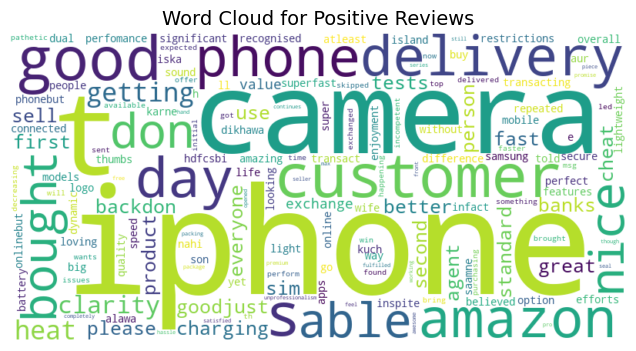

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


text = " ".join(data[data['sentiment'] == "Positive"]['Cleaned_Review'])

# Generate and plot the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(f"Word Cloud for Positive Reviews", fontsize=14)
plt.show()




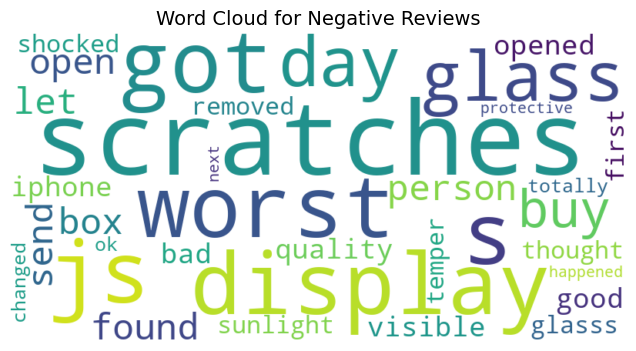

In [ ]:
text = " ".join(data[data['sentiment'] == "Negative"]['Cleaned_Review'])

# Generate and plot the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(f"Word Cloud for Negative Reviews", fontsize=14)
plt.show()


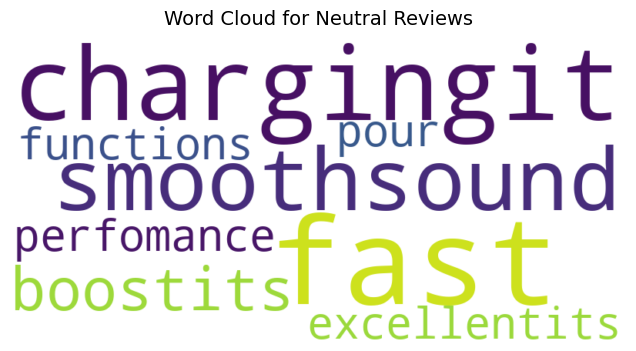

In [ ]:
text = " ".join(data[data['sentiment'] == "Neutral"]['Cleaned_Review'])

# Generate and plot the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(f"Word Cloud for Neutral Reviews", fontsize=14)
plt.show()


In [ ]:
data

,Review,Cleaned_Review,sentiment
0,Its getting heat and camera clarity is not goo...,its getting heat and camera clarity is not goo...,Positive
1,Its getting heat and camera clarity is not goo...,its getting heat and camera clarity is not goo...,Positive
2,This is worst buy person who send this not let...,this is worst buy person who send this not let...,Negative
3,"Dual e sim is a good option. However, inspite ...",dual e sim is a good option however inspite of...,Positive
4,bad,bad,Negative
5,Nice phone,nice phone,Positive
6,Quality not at all good,quality not at all good,Negative
7,"Camera is good, charging is superfast, perfoma...",camera is good charging is superfast perfomanc...,Positive
8,Good phoneBut camera is not good.,good phonebut camera is not good,Positive
9,iPhone 15 worst display.. it’s js 3 days but I...,iphone worst display it’s js days but i got mo...,Negative


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["sentiment"]=le.fit_transform(data["sentiment"])




C:\Users\YOGENDRA JANGID\AppData\Local\Temp\ipykernel_11448\911312912.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["sentiment"]=le.fit_transform(data["sentiment"])


In [ ]:

# Feature Engineering: TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data["Cleaned_Review"])
y = data["sentiment"]

In [ ]:
# Save the TF-IDF vectorizer to a .pkl file
import pickle
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

print("TF-IDF vectorizer saved as tfidf_vectorizer.pkl")

TF-IDF vectorizer saved as tfidf_vectorizer.pkl


In [ ]:
# Split data into train & test sets(20%)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Model Evaluation
from sklearn.metrics import accuracy_score,classification_report
y_pred = LR.predict(X_test)
logistic_regression=f"logistic_regression:", accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           2       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



c:\Users\YOGENDRA JANGID\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\YOGENDRA JANGID\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\YOGENDRA JANGID\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#Train Decision Tree DTC
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
# Predict
y_pred = DTC.predict(X_test)

In [ ]:
# Evaluate
Decision_Tree_Accuracy=f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred):.4f}"
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.5000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           2       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



c:\Users\YOGENDRA JANGID\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\YOGENDRA JANGID\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\YOGENDRA JANGID\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Model
RFC = RandomForestClassifier(n_estimators=100)
RFC.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:

# Predict
y_pred = RFC.predict(X_test)

# Evaluate
Random_Forest_Accuracy=f"Random Forest Accuracy: {accuracy_score(y_test, y_pred):.4f}"
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.5000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           2       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



c:\Users\YOGENDRA JANGID\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\YOGENDRA JANGID\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\YOGENDRA JANGID\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pickle
file='sentiment_deploy'
pickle.dump(RFC,open(file,'wb'))


In [ ]:
from sklearn.svm import SVC

# Train SVM SVM
SVM = SVC(kernel='linear')
SVM.fit(X_train, y_train)


SVC(kernel='linear')

In [ ]:
# Predict
y_pred = SVM.predict(X_test)

# Evaluate
SVM_Accuracy=f"SVM Accuracy: {accuracy_score(y_test, y_pred):.4f}"
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

SVM Accuracy: 0.5000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           2       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



c:\Users\YOGENDRA JANGID\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\YOGENDRA JANGID\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\YOGENDRA JANGID\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
ANN = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # Output Layer (3 Sentiment Categories)
])
# Compile Model
ANN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model
ANN.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))



c:\Users\YOGENDRA JANGID\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2667 - loss: 1.1012 - val_accuracy: 0.5000 - val_loss: 1.0859
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - accuracy: 0.6000 - loss: 1.0653 - val_accuracy: 0.5000 - val_loss: 1.0797
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.8000 - loss: 1.0317 - val_accuracy: 0.5000 - val_loss: 1.0736
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step - accuracy: 0.8000 - loss: 0.9994 - val_accuracy: 0.5000 - val_loss: 1.0678
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.8000 - loss: 0.9688 - val_accuracy: 0.5000 - val_loss: 1.0628
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.8000 - loss: 0.9390 - val_accuracy: 0.5000 - val_loss: 1.0580
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.8000 - loss: 0.9088 - val_accuracy: 0.5000 - val_loss: 1.0534
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.8000 - loss: 0.8783 - val_accuracy: 0.5000 - val_loss: 1.

In [ ]:
# Evaluate Model
loss, accuracy = ANN.evaluate(X_test, y_test)
ANN_Model_Accuracy=f"ANN Model Accuracy: {accuracy:.4f}"
print(f"ANN Model Accuracy: {accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.5000 - loss: 1.0326
ANN Model Accuracy: 0.5000


In [ ]:
print(logistic_regression)
print(Decision_Tree_Accuracy)
print(Random_Forest_Accuracy)
print(SVM_Accuracy)
print(ANN_Model_Accuracy)

('logistic_regression:', 0.5)
Decision Tree Accuracy: 0.5000
Random Forest Accuracy: 0.5000
SVM Accuracy: 0.5000
ANN Model Accuracy: 0.5000
